# 1. Import Packages
Pada tahap ini, kita mengimpor seluruh library yang diperlukan, seperti numpy, pandas, matplotlib, seaborn.

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Loading

Dataset yang akan kita gunakan berasal dari kaggle,jadi kita perlu terlebih dahulu mengunduh datasetnya

In [2]:
# Download latest version
path = kagglehub.dataset_download("parasharmanas/movie-recommendation-system")

print("Path to dataset files:", path)

100%|██████████| 165M/165M [00:03<00:00, 49.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/parasharmanas/movie-recommendation-system/versions/1


file yang sudah kita unduh akan terdiri dari 2 file data yang ada yaitu file movies dan file rating.

Kita perlu baca file yang telah diunduh lalu simpan ke dalam variabel movies dan ratings.

In [3]:
movies = pd.read_csv(path + "/movies.csv")
ratings = pd.read_csv(path + "/ratings.csv")

# 3. Data Understanding
Tahap ini merupakan proses analisis data yang bertujuan untuk memahami dataset secara mendalam sebelum melakukan analisis lebih lanjut.

| Jenis    | Keterangan                                                |
|----------|-----------------------------------------------------------|
| Title    | Movie Recommendation System                               |
| Source   |[Kaggle](https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system/data)        |
| Owner    | [MANAS PARASHAR ](https://www.kaggle.com/parasharmanas)                                                  |
| License  | Database: Open Database, Contents: Database Contents      |
| Tags     | Arts and Entertainment, Movies and TV Shows               |
| Usability | 10.00                                                     |

**movies.csv**
 - movieId : ID unik untuk setiap film.
 - title : Judul Tiap Film.
 - genres : Genre FIlm, dipisahkan dengan tanda "|".

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**ratings.csv**
 - userId : ID unik untuk setiap User.
 - movieId : ID unik untuk setiap film.
 - rating : Penilaian yang diberikan oleh User untuk film yang telah ditonton.
 - timestamp : Waktu ketika User memberikan rating.

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


## Exploratory Data Analysis

### Deskripsi Variabel

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [7]:
movies.shape

(62423, 3)

In [8]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,62423.0,122220.387646,63264.744844,1.0,82146.5,138022.0,173222.0,209171.0


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [10]:
ratings.shape

(25000095, 4)

In [11]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,25000095.0,8.118928e+04,4.679172e+04,1.0,4.051000e+04,8.091400e+04,1.215570e+05,1.625410e+05
movieId,25000095.0,2.138798e+04,3.919886e+04,1.0,1.196000e+03,2.947000e+03,8.623000e+03,2.091710e+05
rating,25000095.0,3.533854e+00,1.060744e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,25000095.0,1.215601e+09,2.268758e+08,789652009.0,1.011747e+09,1.198868e+09,1.447205e+09,1.574328e+09


### Cek Missing Value dan Duplicate Value
Pada tahap ini, kita akan mengecek apakah ada baris data yang terdapat missing value dan duplicate value

In [12]:
movies.isnull().sum()

,0
movieId,0
title,0
genres,0


In [13]:
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [14]:
movies.duplicated().sum()

0

In [15]:
ratings.duplicated().sum()

0

setalah pengecekan, kedua file tidak ditemukan adanya missing value dan duplicate value

### Univariate Analysis

In [16]:
print(f"Jumlah Film yang ada: {movies['title'].nunique()}")
print(f"Jumlah User yang memberi rating: {ratings.userId.nunique()}")

Jumlah Film yang ada: 62325
Jumlah User yang memberi rating: 162541


Menggabungkan data movies dan data ratings untuk di analisis

In [17]:
merged_data = pd.merge(ratings, movies, on='movieId')

<ipython-input-18-27424c378991>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


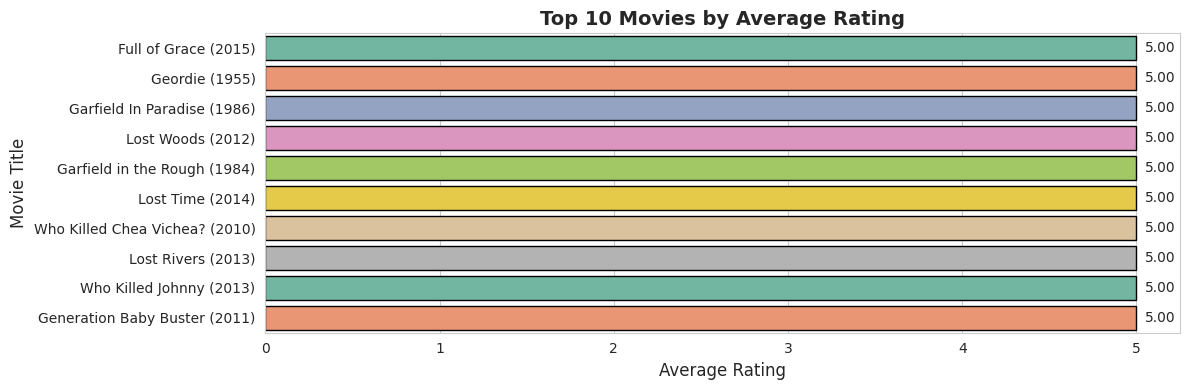

In [18]:
# Top 10 movies by average rating
top_movies = merged_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame for compatibility with Seaborn
top_movies_df = top_movies.reset_index()
top_movies_df.columns = ['Movie Title', 'Average Rating']

# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 4))

# Plot horizontal bar chart with Set2 palette
sns.barplot(
    x='Average Rating',
    y='Movie Title',
    data=top_movies_df,
    palette='Set2',  # Use Set2 color palette
    edgecolor='black'
)

# Add title and labels
plt.title('Top 10 Movies by Average Rating', fontsize=14, weight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)

# Add value labels to each bar
for index, value in enumerate(top_movies_df['Average Rating']):
    plt.text(value + 0.05, index, f'{value:.2f}', va='center', fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Terlihat bahwa 10 film diatas,memiliki rata-rata sebesar 5.0

# Data Preparation

Teknik Data preparation yang dilakukan terdiri dari:
- Data Preprocessing
- TF-IDF Vectorizer Data Movies
- Encoding Data Ratings
- Membagi Data untuk Training dan Validasi

## Data Preprocessing

In [22]:
movies.sample(10)

,movieId,title,genres
8843,26497,Another Country (1984),Drama|Romance
31102,137759,Susie Q (1996),Children|Comedy|Drama|Mystery
57560,196627,Malicious (2018),Horror|Thriller
46375,172315,Justin Time (2010),Action|Adventure|Children|Fantasy|Sci-Fi
46550,172675,From 180 & Taller (2005),Comedy|Romance
584,592,Batman (1989),Action|Crime|Thriller
50871,181949,The Pelican and the Snipe (1944),Animation
11793,54833,Brighton Rock (1947),Crime|Drama|Film-Noir
38530,155020,Summers Downstairs (2015),(no genres listed)
60431,203290,Check to the Queen (1969),Drama|Romance


Pada data movies, terdapat beberapa baris yamg memiliki genre `(no genres listed)`.

In [23]:
movies[movies['genres'] == '(no genres listed)']

,movieId,title,genres
15881,83773,Away with Words (San tiao ren) (1999),(no genres listed)
16060,84768,Glitterbug (1994),(no genres listed)
16351,86493,"Age of the Earth, The (A Idade da Terra) (1980)",(no genres listed)
16491,87061,Trails (Veredas) (1978),(no genres listed)
17404,91246,Milky Way (Tejút) (2007),(no genres listed)
...,...,...,...
62400,209101,Hua yang de nian hua (2001),(no genres listed)
62401,209103,Tsar Ivan the Terrible (1991),(no genres listed)
62407,209133,The Riot and the Dance (2018),(no genres listed)
62415,209151,Mao Zedong 1949 (2019),(no genres listed)


Karena Kita akan menggunakan sistem rekomendasi berbasis genre film, maka genre `(not genres listed)` akan kita hapus.

In [24]:
movies = movies[movies['genres'] != '(no genres listed)']

Menyamakan genre film

In [25]:
final_movies = movies.sort_values('movieId', ascending=True)
final_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama


karena data `ratings` sangat banyak dan tidak sepadan dengan sumber daya yang saya miliki oleh karena itu kita akan mengambil beberap puluh ribu saja untuk dijadikan sample.

In [26]:
ratings = ratings.sample(n=10000, random_state=42)

In [27]:
example_rating = ratings.copy()
example_rating.head()

,userId,movieId,rating,timestamp
15347762,99476,104374,3.5,1467897440
16647840,107979,2634,4.0,994007728
23915192,155372,1614,3.0,1097887531
10052313,65225,7153,4.0,1201382275
12214125,79161,500,5.0,1488915363


Hapus fitur `timestamp` dari data ratings karena kita hanya menggunakan kolom `userId,movieId,rating` pada tahap pemodelan nanti.

In [28]:
final_ratings = ratings.drop(columns=['timestamp'])
final_ratings.head()

,userId,movieId,rating
15347762,99476,104374,3.5
16647840,107979,2634,4.0
23915192,155372,1614,3.0
10052313,65225,7153,4.0
12214125,79161,500,5.0


## TF-IDF Vectorizer Data Movies

Karena komputer hanya dapat memproses data numerik, oleh karena itu data genres perlu kita ubah menjadi numerik dengan menggunakan TFidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada kolom `genres`
tf.fit(final_movies['genres'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax',
       'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war',
       'western'], dtype=object)

selanjutnya kita lakukan fit dan transform ke dalam bentuk matriks

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(final_movies['genres'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(57361, 21)

matriks yang kita miliki berukuran (57361, 21). Nilai 57361 merupakan ukuran data dan 21 merupakan genres film.

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense().

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.44636731, 0.4890865 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.53896467, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.60197377, 0.71477328, 0.        , ..., 0.        , 0.        ,
         0.        ]])

melihat matriks tf-idf untuk beberapa film dan genrenya

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis genre
# Baris diisi dengan title movie

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=final_movies.title
).sample(21, axis=1).sample(10, axis=0)

,fi,horror,sci,romance,crime,animation,thriller,film,imax,musical,...,mystery,children,action,western,drama,war,noir,fantasy,documentary,adventure
title,,,,,,,,,,,,,,,,,,,,,
Spriggan (Supurigan) (1998),0.515139,0.0,0.515139,0.000000,0.0,0.543129,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.417464,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
"Nativity Story, The (2006)",0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
UHF (1989),0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
The Great American Broadcast (1941),0.000000,0.0,0.000000,0.803885,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Making the Connection: Untold Stories of 'The French Connection' (2001),0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
Dior and I (2014),0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
Celluloid (2014),0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.848066,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.529891,0.0,0.0,0.0,0.0,0.0
"Time Regained (Temps retrouvé, Le) (1999)",0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
Pistol Whipped (2008),0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.860754,0.0,0.509021,0.0,0.0,0.0,0.0,0.0


## Encoding Data Ratings

melakukan prosesn encode pada kolom `userId` dan `movieId`

In [ ]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = final_ratings['userId'].unique().tolist()

# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [ ]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = final_ratings['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [ ]:
# Mapping userId ke dataframe user
final_ratings['user'] = final_ratings['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe movie
final_ratings['movie'] = final_ratings['movieId'].map(movie_to_movie_encoded)

melihat beberapa hal seperti jumlah user,jumlah movie

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_to_movie_encoded)
print(num_movie)

# Mengubah rating menjadi nilai float
final_ratings['rating'] = final_ratings['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(final_ratings['rating'])

# Nilai maksimal rating
max_rating = max(final_ratings['rating'])

print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

9041
3658
Number of User: 9041, Number of movie: 3658, Min Rating: 0.5, Max Rating: 5.0


## Membagi Data untuk Training dan Validasi

In [ ]:
final_ratings = final_ratings.sample(frac=1, random_state=42)
final_ratings

,userId,movieId,rating,user,movie
2332797,15541,1240,4.0,5851,359
9496674,61719,44191,5.0,4469,1519
12940647,83787,26606,3.0,1701,1222
19652600,127634,2353,2.0,4522,604
8410983,54785,2019,5.0,4327,200
...,...,...,...,...,...
22736601,147810,2927,3.0,5390,2657
18354331,118865,2706,4.5,4924,318
11047125,71839,2320,2.5,633,2560
21757612,141460,1225,3.0,853,690


 Memerakan data user dan movie lalu melakukan proses scaling dari 0 - 1 untuk mempermudah proses training dan membagi data train dan validasi menjadi 80:20

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = final_ratings[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = final_ratings['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * final_ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[5851  359]
 [4469 1519]
 [1701 1222]
 ...
 [ 633 2560]
 [ 853  690]
 [6740 3053]] [0.77777778 1.         0.55555556 ... 0.44444444 0.55555556 1.        ]


# Modeling and Result

Pada tahapan model yang digunakan terdiri dari:

- Cosine Similarity
- recomenderNet

## Content Based Filtering - Cosine Similarity

selanjutnya menghitung derajat kesamaan (similarity degree) antar anime dengan teknik cosine similarity. Di sini, kita menggunakan fungsi cosine_similarity dari library sklearn dengan kode berikut.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.828194  , 0.16276817, ..., 0.        , 0.21240484,
        0.31905143],
       [0.828194  , 1.        , 0.        , ..., 0.        , 0.        ,
        0.38523755],
       [0.16276817, 0.        , 1.        , ..., 0.        , 0.46165262,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.21240484, 0.        , 0.46165262, ..., 0.        , 1.        ,
        0.2244596 ],
       [0.31905143, 0.38523755, 0.        , ..., 0.        , 0.2244596 ,
        1.        ]])

Pada tahap ini, kita akan menghitung tingkat kesamaan antar film menggunakan matriks *TF-IDF* yang telah dibuat sebelumnya. Dengan satu baris kode, kita dapat memanfaatkan fungsi *cosine similarity* dari pustaka sklearn. Proses ini menghasilkan sebuah matriks kesamaan dalam bentuk array, yang menggambarkan hubungan atau kemiripan antar film berdasarkan fitur yang telah diolah.

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama movie
cosine_sim_df = pd.DataFrame(cosine_sim, index=final_movies['title'], columns=final_movies['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap movie
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (57361, 57361)


title,"Child Is Born, A (1939)",On the Ice (2011),The Big Store (1973),Run for the Sun (1956),A Scream in the Streets (1973)
title,,,,,
Tell No One (2012),0.000000,0.000000,1.000000,0.000000,0.000000
C.H.O.M.P.S. (1979),0.000000,0.000000,0.384992,0.000000,0.000000
Bubble (2006),0.327214,0.173388,0.000000,0.129132,0.453794
Psychokinesis (2018),0.000000,0.000000,0.000000,0.327084,0.328755
Lullaby (2014),1.000000,0.529891,0.000000,0.394640,0.000000
Changing Lanes (2002),0.529891,1.000000,0.000000,0.744757,0.000000
Counter Investigation (Contre-enquête) (2007),0.471597,0.249895,0.000000,0.186111,0.654030
200 Cigarettes (1999),0.630528,0.334111,0.776167,0.248831,0.000000
At War as at War (1969),0.378277,0.200446,0.000000,0.149283,0.000000


Dengan cosine similarity, kita berhasil mengidentifikasi kesamaan antara satu movie dengan movie lainnya.

### Mendapatkan rekomendasi

In [ ]:
def movie_recommendations(movie, similarity_data=cosine_sim_df, items=final_movies[['title', 'genres']], k=10):


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,movie].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop movie agar movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movie, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Pada kode tersebut, dengan memanfaatkan fungsi *argpartition*, kita mengambil sejumlah nilai *k* tertinggi dari data kesamaan (dalam hal ini: dataframe `cosine_sim_df`). Selanjutnya, data kesamaan ini diurutkan dari bobot tertinggi ke terendah dan disimpan dalam variabel `closest`. Setelah itu, untuk memastikan hasil rekomendasi tidak menampilkan movie yang sama dengan movie yang dicari, kita menghapus nama movie tersebut dari daftar rekomendasi. Misalnya, jika kita mencari film yang mirip dengan *Fatty Finn (1980)*, maka nama film *Fatty Finn (1980)* akan dihapus dari hasil rekomendasi agar tidak muncul kembali.

In [ ]:
final_movies.sample(1)

,movieId,title,genres
39400,157114,Fatty Finn (1980),Children|Comedy|Fantasy


Kita akan melakukan rekomendasi film yang berjudul *Fatty Finn (1980)* dengan genre `	Children|Comedy|Fantasy`.Tentu kita berharap rekomendasi yang diberikan adalah movie dengan genre yang mirip. Sekarang, kita akan dapatkan  rekomendasi movie dengan memanggil fungsi yang telah kita definisikan sebelumnya:

In [ ]:
movie_recommendations('Fatty Finn (1980)')

,title,genres
0,I Downloaded a Ghost (2004),Children|Comedy|Fantasy
1,Nanny McPhee Returns (a.k.a. Nanny McPhee and ...,Children|Comedy|Fantasy
2,Elf (2003),Children|Comedy|Fantasy
3,Like Mike (2002),Children|Comedy|Fantasy
4,Kazaam (1996),Children|Comedy|Fantasy
5,Dr. Dolittle: Million Dollar Mutts (2009),Children|Comedy|Fantasy
6,Dr. Dolittle: Tail to the Chief (2008),Children|Comedy|Fantasy
7,That still Karloson! (2012),Children|Comedy|Fantasy
8,Super Xuxa Contra o Baixo Astral (1988),Children|Comedy|Fantasy
9,Pufnstuf (1970),Children|Comedy|Fantasy


Sistem akan memberikan movie dengan genre `Children|Comedy|Fantasy`

## Collaborative Filtering - RecomenderNet

Model ini menghitung skor kecocokan antara pengguna dan film dengan menggunakan teknik *embedding*. Proses ini mencakup pembuatan representasi *embedding* untuk data user dan movie, kemudian melakukan operasi perkalian (*dot product*) antara kedua embedding tersebut. Selain itu, bias untuk setiap pengguna dan film juga dapat ditambahkan ke dalam perhitungan. Skor kecocokan dihasilkan dalam rentang [0,1] dengan memanfaatkan fungsi aktivasi *sigmoid*.

Untuk implementasinya, sebuah kelas bernama `RecommenderNet` dibuat dengan mewarisi kelas Model dari pustaka Keras. Struktur kode kelas ini terinspirasi dari tutorial pada situs resmi Keras, dengan beberapa penyesuaian yang disesuaikan dengan kebutuhan kasus sistem rekomendasi film. Berikut merupakan penerapkan kodenya:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

lalu lakukan compile terhadap model dengan *loss function __BinaryCrossentropy__,optimer __Adam__ dan metrik evaluasi __RMSE__*

In [ ]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

lalukan proses training dengan epoch sebesar 100

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
250/250 [==============================] - 4s 13ms/step - loss: 0.6916 - root_mean_squared_error: 0.2910 - val_loss: 0.6895 - val_root_mean_squared_error: 0.2951
Epoch 2/100
250/250 [==============================] - 3s 12ms/step - loss: 0.6356 - root_mean_squared_error: 0.2390 - val_loss: 0.6874 - val_root_mean_squared_error: 0.2932
Epoch 3/100
250/250 [==============================] - 3s 12ms/step - loss: 0.6272 - root_mean_squared_error: 0.2311 - val_loss: 0.6868 - val_root_mean_squared_error: 0.2928
Epoch 4/100
250/250 [==============================] - 3s 12ms/step - loss: 0.6220 - root_mean_squared_error: 0.2256 - val_loss: 0.6850 - val_root_mean_squared_error: 0.2911
Epoch 5/100
250/250 [==============================] - 3s 12ms/step - loss: 0.6205 - root_mean_squared_error: 0.2249 - val_loss: 0.6846 - val_root_mean_squared_error: 0.2909
Epoch 6/100
250/250 [==============================] - 3s 12ms/step - loss: 0.6173 - root_mean_squared_error: 0.2207 - val_loss: 0

**Hasil Top-N Rekomendasi RecommenderNet**

Untuk mendapatkan rekomendasi *movie*, kita akan mengambil sampel pengguna secara acak dan mendefinisikan variabel `movies_not_visited`, yaitu daftar *movie* yang belum pernah ditonton oleh pengguna tersebut. Daftar ini menjadi basis dari rekomendasi yang akan diberikan kepada pengguna.

Sebelumnya, pengguna telah memberikan penilaian pada beberapa *movie* yang pernah mereka tonton. Penilaian ini digunakan untuk membuat rekomendasi *movie* yang sesuai dengan preferensi mereka. Karena rekomendasi hanya akan diberikan untuk *movie* yang belum ditonton, kita perlu membuat variabel `movies_not_visited` sebagai daftar *movie* yang belum pernah diakses oleh pengguna.

Variabel `movies_not_visited` diperoleh dengan menggunakan operator bitwise `~` pada variabel `movies_visited_by_user`. Operator ini membantu kita menentukan *movie* mana yang belum ada dalam daftar *visited*. Berikut adalah kode yang dapat digunakan untuk mengimplementasikan proses ini.

In [ ]:
movies_df = final_movies
df = example_rating

In [ ]:
# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movies_visited_by_user = df[df.userId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movies_not_visited = movies_df[~movies_df['movieId'].isin(movies_visited_by_user.movieId.values)]['movieId']
movies_not_visited = list(
    set(movies_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movies_not_visited = [[movie_to_movie_encoded.get(x)] for x in movies_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movies_array = np.hstack(
    ([[user_encoder]] * len(movies_not_visited), movies_not_visited)
)

In [ ]:
ratings = model.predict(user_movies_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movies_ids = [
    movie_encoded_to_movie.get(movies_not_visited[x][0]) for x in top_ratings_indices
]

print('Rekomendasi untuk pengguna: {}'.format(user_id))
print('===' * 15)
print('Movie dengan rating tertinggi dari pengguna')
print('----' * 15)

top_movies_user = (
    movies_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movies_df_rows = movies_df[movies_df['movieId'].isin(top_movies_user)]
for row in movies_df_rows.itertuples():
    print(row.title, ':', row.genres)

print('----' * 15)
print('Rekomendasi Movies 10 Teratas')
print('----' * 15)

recommended_movies = movies_df[movies_df['movieId'].isin(recommended_movies_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ':', row.genres)

115/115 [==============================] - 0s 1ms/step
Rekomendasi untuk pengguna: 140983
Movie dengan rating tertinggi dari pengguna
------------------------------------------------------------
Exorcist, The (1973) : Horror|Mystery
Tropic Thunder (2008) : Action|Adventure|Comedy|War
------------------------------------------------------------
Rekomendasi Movies 10 Teratas
------------------------------------------------------------
Gone with the Wind (1939) : Drama|Romance|War
39 Steps, The (1935) : Drama|Mystery|Thriller
Stalker (1979) : Drama|Mystery|Sci-Fi
Cool Hand Luke (1967) : Drama
High Noon (1952) : Drama|Western
Joy Luck Club, The (1993) : Drama|Romance
Rocky (1976) : Drama
Stepmom (1998) : Drama
Risky Business (1983) : Comedy
Last Unicorn, The (1982) : Animation|Children|Fantasy


Berdasarkan hasil di atas adalah rekomendasi untuk user dengan id 140983. Dari output tersebut, kita dapat membandingkan antara movie dengan rating tertinggi dari pengguna dan Rekomendasi 10 movie teratas untuk user.

# Evaluasi Model

## Evaluasi Content Based Filtering - Cosine Simmilarity

Model ini hanya menggunakan metrik Precision untuk mengetahui seberapa baik perforam model tersebut. _Precision_ adalah metrik evaluasi yang digunakan untuk mengukur seberapa relevan item yang direkomendasikan oleh model dibandingkan dengan semua item yang direkomendasikan. Metrik ini dihitung sebagai rasio antara jumlah rekomendasi yang relevan (true positives) dengan total jumlah item yang direkomendasikan. Perhitungan rasio ini dijabarkan melalui rumus di bawah ini:

$$Precision = \frac{TP}{TP + FP}$$

Dimana:

- TP (*True Positive*), jumlah kejadian positif yang diprediksi dengan benar.
- FP (*False Positive*), jumlah kejadian positif yang diprediksi dengan salah.

Berdasarkan rekomendasi movie dengan genre serupa yaitu `Children|Comedy|Fantasy`, diketahui bahwa semua film yang direkomendasikan  memiliki genre serupa. Sehingga presisi sistem rekomendasi berbasis content-based filtering yang telah dibuat berhasil mencapai 10/10 atau 100%.

## Evaluasi Collaborative Filtering - RecommenderNet

Evaluasi metrik yang dapat digunakan untuk mengukur kinerja model ini adalah metrik _RMSE_ (*Root Mean Squared Error*). RMSE adalah metrik yang mengukur seberapa besar perbedaan antara prediksi model dengan nilai aktual dalam dataset. Metrik ini menghitung akar kuadrat dari rata-rata kuadrat kesalahan prediksi. RMSE cocok digunakan untuk mengevaluasi sistem rekomendasi berbasis rating, karena memberikan bobot lebih besar pada kesalahan besar, sehingga membantu mendeteksi apakah model menghasilkan prediksi yang terlalu jauh dari nilai sebenarnya. Nilai RMSE yang lebih rendah menunjukkan performa model yang lebih baik. RMSE dapat dijabarkan melalui pendekatan rumus berikut ini

$$RMSE =  \sqrt{\frac{\sum_{t=1}^{n}(A_t - F_t)^2}{n}}$$

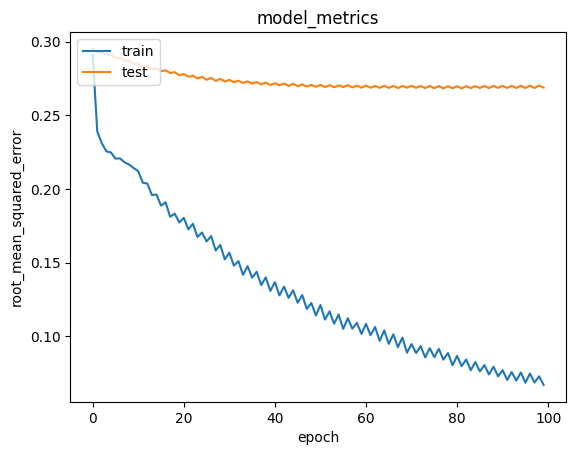

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Dengan epoch sebanyak 100, model ini memperoleh nilai error akhir sebesar sekitar 0.05 untuk training dan error pada data validasi sebesar 0.27. Nilai tersebut cukup bagus untuk sistem rekomendasi.

Berdasarkan hasil yang didapat pada tahap Model and Result untuk user dengan id 140983 model berhasil merekomendasikan Movie dengan rating tertinggi dari pengguna dan Rekomendasi Top-10 anime teratas untuk user 140983.

# Kesimpulan

Dari hasil evaluasi, penerapan sistem rekomendasi menggunakan Content-Based Filtering dengan Cosine Similarity dan Collaborative Filtering berbasis RecommenderNet telah memenuhi tujuan proyek. Pendekatan Content-Based Filtering berhasil merekomendasikan film secara relevan berdasarkan kesamaan fitur genre dengan tingkat Precision yang tinggi, terutama dalam menyusun rekomendasi Top-10 sesuai genre. Di sisi lain, pendekatan Collaborative Filtering dengan RecommenderNet menunjukkan performa yang baik dalam memprediksi preferensi pengguna berdasarkan pola rating, dengan tingkat kesalahan prediksi rendah (RMSE sebesar 0.05 pada data pelatihan dan 0.27 pada data validasi). Secara keseluruhan, kedua metode ini mampu memberikan rekomendasi yang akurat dan relevan, sesuai dengan tujuan utama, yaitu memberikan saran film berdasarkan genre yang relevan dengan preferensi pengguna.